## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
num_of_mice = len(pd.unique(mouse_study["Mouse ID"]))

num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_time_count = mouse_study[["Mouse ID","Timepoint"]].value_counts(sort=True).head(10)
mouse_time_count

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [4]:

duplicates = mouse_study[["Mouse ID","Timepoint"]].value_counts()
duplicates

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_time_duplicates = mouse_study[mouse_study.duplicated(subset=["Mouse ID","Timepoint"])]
mouse_time_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# To keep one copy of the duplicate data, use below.
# duplicates_index = mouse_time_duplicates.index
# cleaned_set = mouse_study.drop(duplicates_index)

cleaned_set = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]

cleaned_set

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
num_of_mice1 = len(pd.unique(cleaned_set["Mouse ID"]))

num_of_mice1

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

cleaned_set_slim = cleaned_set[["Drug Regimen","Tumor Volume (mm3)"]]
mean_data = cleaned_set_slim.groupby("Drug Regimen").mean().reset_index()
median_data = cleaned_set_slim.groupby("Drug Regimen").median().reset_index()
var_data = cleaned_set_slim.groupby("Drug Regimen").var().reset_index()
std_data = cleaned_set_slim.groupby("Drug Regimen").std().reset_index()
sem_data = cleaned_set_slim.groupby("Drug Regimen").sem().reset_index()

mean_median = pd.merge(mean_data,median_data,how="left", on="Drug Regimen")
mean_median.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume","Tumor Volume (mm3)_y":"Median Tumor Volume"}, inplace=True)

add_var = pd.merge(mean_median,var_data,how="left", on="Drug Regimen")
add_var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace=True)

add_std = pd.merge(add_var,std_data,how="left", on="Drug Regimen")
add_std.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace=True)

agg_data = pd.merge(add_std,sem_data,how="left", on="Drug Regimen")
agg_data.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace=True)

agg_data

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_set_slim.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

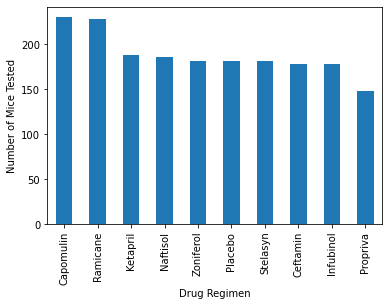

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_bar = cleaned_set[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count().sort_values(by="Timepoint",ascending=False).reset_index()
mice_bar_plot = mice_bar.plot(kind="bar",x="Drug Regimen",y="Timepoint", xlabel="Drug Regimen", ylabel="Number of Mice Tested", legend=False)
mice_bar_plot

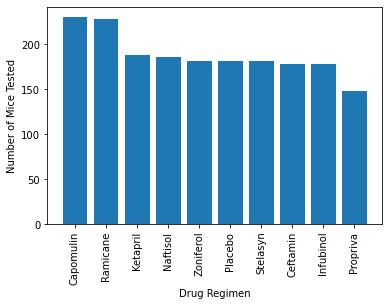

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig, ax = plt.subplots()
pyplot_mice_bar = plt.bar(mice_bar["Drug Regimen"],mice_bar["Timepoint"])
ax.set_ylabel('Number of Mice Tested')
ax.set_xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.show()

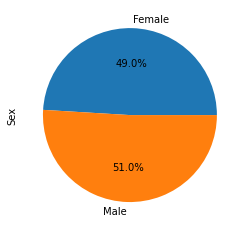

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie = cleaned_set[["Sex","Timepoint"]].groupby("Sex").count()
mice_pie
mice_pie_plot = mice_pie.plot(kind="pie",y="Timepoint",autopct="%1.1f%%",ylabel="Sex", legend=False)

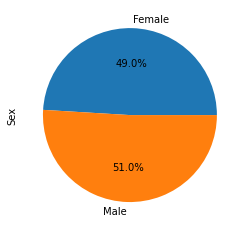

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_pie2 = cleaned_set[["Sex","Timepoint"]].groupby("Sex").count().reset_index()
fig, ax = plt.subplots()
pyplot_mice_pie = plt.pie(mice_pie2["Timepoint"],autopct="%1.1f%%",labels=mice_pie2["Sex"])
ax.set_ylabel('Sex')
# ax.set_xlabel('Drug Regimen')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_time = cleaned_set[["Mouse ID","Timepoint"]].groupby("Mouse ID").max()#.reset_index()
max_time.rename(columns={"Timepoint":"Max Time"}, inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_time = pd.merge(cleaned_set,max_time, how="left", on="Mouse ID")
merge_max_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Time
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(cleaned_set["Drug Regimen"].unique())


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
tumor_volume_populate = merge_max_time[merge_max_time["Timepoint"]==merge_max_time["Max Time"]]
tumor_volume_slim = tumor_volume_populate["Tumor Volume (mm3)"]
# print(type(tumor_volume_list[1]))
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_volume_slim.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
drugs_mice = [merge_max_time[(merge_max_time["Drug Regimen"]==x) & (merge_max_time["Timepoint"] == merge_max_time["Max Time"])] for x in treatment_list]
# list(drugs_mice[0]["Tumor Volume (mm3)"])
element = 0
for x in drugs_mice:
    tumor_volume_list.append(list(drugs_mice[element]["Tumor Volume (mm3)"]))
    element = element+1
    # add subset

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
drugs_mice



[     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
 645      w150         10           39.952347                 0    Capomulin   
 795      r157         15           46.539206                 0    Capomulin   
 922      f966         20           30.485985                 0    Capomulin   
 1485     j246         35           38.753265                 1    Capomulin   
 1751     b128         45           38.982878                 2    Capomulin   
 1756     t565         45           34.455298                 0    Capomulin   
 1758     l509         45           41.483008                 3    Capomulin   
 1764     g288         45           37.074024                 1    Capomulin   
 1775     r554         45           32.377357                 3    Capomulin   
 1778     g316         45           40.159220                 2    Capomulin   
 1784     y793         45           31.896238                 2    Capomulin   
 1787     m957         45           33.3

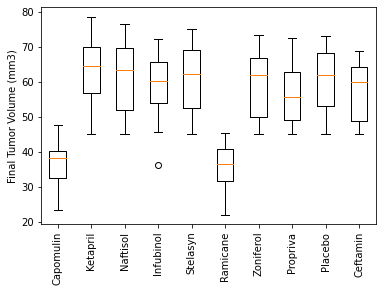

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumer_volume_df = pd.DataFrame(tumor_volume_list)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_list)
ax1.set_xticklabels(treatment_list)
plt.xticks(rotation = 90)
plt.show()

## Line and Scatter Plots

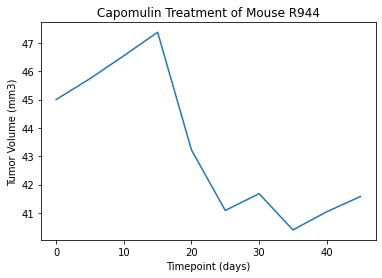

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Not sure why we're taking data from one mouse vs a mean of all of the mice taking Capomulin...but if we want to take the measure of all of the mice taking Capomulin, use the commented code instead
#mice_line = cleaned_set.loc[(cleaned_set["Drug Regimen"] == "Capomulin")]
mice_line = cleaned_set.loc[(cleaned_set["Drug Regimen"] == "Capomulin") & (cleaned_set["Mouse ID"] == "r944")]
# mice_line
mice_line_mean = mice_line.groupby("Timepoint").mean()
mice_line_mean_slim = mice_line_mean[["Tumor Volume (mm3)"]]
mice_line_plot = mice_line_mean_slim.plot(ylabel="Tumor Volume (mm3)", xlabel="Timepoint (days)",title="Capomulin Treatment of Mouse R944",legend=False)

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

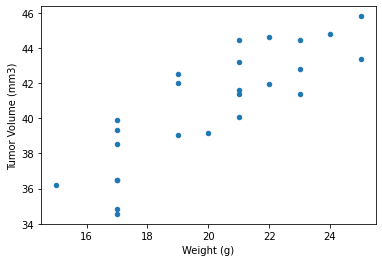

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_scatter = cleaned_set.loc[(cleaned_set["Drug Regimen"] == "Capomulin")]
mice_scatter_average = mice_scatter.groupby("Mouse ID").mean()
# mice_scatter_average
mice_scatter_plot = mice_scatter_average.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
mice_scatter_plot

## Correlation and Regression

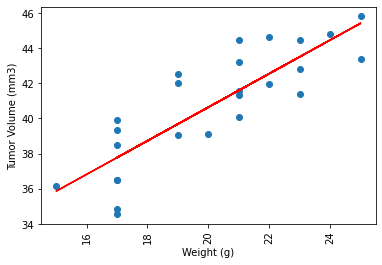

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# mice_scatter
fig, ax = plt.subplots()
mice_scatter_plot2 = plt.scatter(mice_scatter_average["Weight (g)"],mice_scatter_average["Tumor Volume (mm3)"])
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Weight (g)')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mice_scatter_average["Weight (g)"], mice_scatter_average["Tumor Volume (mm3)"])
regress_values = mice_scatter_average["Weight (g)"] * slope + intercept
plt.plot(mice_scatter_average["Weight (g)"],regress_values,"r-")
plt.xticks(rotation = 90)
plt.show()